## Introduction: Seoul Bike Sharing Demand Analysis

### Project Overview
In this project, we delve into the analysis of bike sharing demand in Seoul, South Korea. With the growing emphasis on sustainable urban mobility and the rising popularity of bike sharing systems, understanding the dynamics of bike sharing demand becomes crucial. Our analysis aims to uncover the patterns and factors influencing this demand, leveraging the power of data science and machine learning.

### Objectives
- **Exploratory Data Analysis (EDA)**: To visually and statistically explore the relationships between different variables related to bike sharing.
- **Predictive Modeling**: To build and evaluate various regression models, predicting bike sharing demand based on a range of influencing factors.
- **Hyperparameter Tuning**: To optimize our models for better accuracy using techniques like Randomized Search CV.
- **Insight Generation**: To provide actionable insights that could assist in efficient management and planning of bike sharing services in Seoul.

Through this project, we seek to demonstrate the application of data analysis and machine learning in urban planning and public transportation management. The insights derived could be instrumental in enhancing the efficiency and effectiveness of bike sharing systems in Seoul.


## Data Description: Understanding the Seoul Bike Sharing Dataset

### Dataset Overview
The dataset for this project comprises records from Seoul's bike sharing system. It includes various features that potentially influence bike sharing demand, offering a comprehensive view of the usage patterns.

### Key Features
- **Temporal Data**: Date and time information, providing insights into hourly, daily, and seasonal demand variations.
- **Weather Conditions**: Data on temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, and snowfall. These factors are crucial in understanding how weather impacts bike sharing usage.
- **User Information**: Details on the number of bikes rented per hour (target variable), along with other possibly relevant user-related data.

### Data Enhancements
- **Feature Engineering**: Additional time-related features such as day of the week, month, and year were derived from the date information to further enrich our analysis.
- **Preprocessing Steps**: The dataset underwent necessary preprocessing, including handling missing values, feature scaling, and encoding categorical variables.

This dataset serves as the foundation of our analysis, enabling us to draw meaningful conclusions about the factors influencing bike sharing demand in Seoul. The diverse range of features allows for a multifaceted exploration of how environmental conditions and temporal factors converge to affect urban mobility choices.


This cell imports necessary libraries such as pandas, matplotlib, and others that are essential for data processing and visualization."


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import datetime
from dash import Dash, html, dcc
from jupyter_dash import JupyterDash
from IPython.display import IFrame
from dash.dependencies import Input, Output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder , PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

This cell loads the Seoul bike sharing data from a file into a pandas DataFrame for further analysis.

In [7]:
df = pd.read_csv("D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData.csv", encoding='ISO-8859-1')

To get the quick overview of the data set we can use the below code.

`df.shape` - his line of code is used to check the dimensions of the DataFrame. It returns a tuple representing the number of rows and columns in the DataFrame.

`df.head()` - This command is used to display the first few rows of the DataFrame. By default, it shows the first five rows, but you can specify a different number inside the parentheses.

In [8]:
df.shape


(8760, 14)

In [9]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

`df.describe()` This command is particularly useful in the exploratory data analysis phase, where you want to quickly understand the basic features of each column in your dataset, including central tendency, dispersion, and the presence of null values. It's a quick way to get a comprehensive overview of your data, both numeric and non-numeric.

In [10]:
df.describe(include="all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Enhancing the Dataset with Time-based Features

In this section, we enhance the original dataset by extracting additional time-based features from the 'Date' column. This is crucial for a more detailed analysis and for making more accurate predictions. The steps taken are:

1. **Convert 'Date' to Datetime**: First, we convert the 'Date' column to a datetime format using `pd.to_datetime`. This standardizes the date format and enables further date-based manipulations.

2. **Extracting Time Components**:
    - **Weekdays**: Extract the day of the week using `dt.day_name()` and store it in a new column 'Weekdays'. This helps in analyzing bike demand patterns on different days of the week.
    - **Days**: Extract the day of the month using `dt.day` and add it as the 'Days' column. It can be useful for identifying trends within a month.
    - **Months**: Extract the month using `dt.month` and create a 'Months' column. This is vital for understanding seasonal variations in bike sharing demand.
    - **Years**: Extract the year from the date using `dt.year` and add it to the 'Years' column. This assists in year-over-year trend analysis.

3. **Saving the Enhanced Dataset**: After adding these columns, we save the updated DataFrame to a new CSV file. This ensures that our enhanced dataset is preserved for future analysis and modeling.

The addition of these time-based features will allow for a more nuanced understanding of the bike sharing demand, considering factors like day of the week, monthly, and seasonal trends.


In [12]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df["Date"] = pd.to_datetime(df["Date"])

df["Weekdays"] = df["Date"].dt.day_name()
df["Days"] = df["Date"].dt.day
df["Months"] = df["Date"].dt.month
df["Years"] = df["Date"].dt.year

df.to_csv(r"D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData_Updated.csv", encoding='ISO-8859-1', index=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [14]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day Weekdays  Days  Months  Years  
0             Yes   Friday     1      12   2017  
1             Yes   Friday     1      12   2017  
2             Yes   Friday     1      12   2017  
3             Yes   Friday     1      12   2017  
4             Yes   Friday     1      12   2017

## Exploring Relationships with Pair Plots

Here, we use Seaborn's `pairplot` function to create a matrix of scatter plots. This matrix helps us visually examine the relationships between all pairs of numerical variables in the dataset. Key insights we can derive from these plots include:

- **Correlations**: Identifying which variables have strong positive or negative correlations.
- **Outliers**: Spotting any outliers in our data.
- **Distribution Patterns**: Observing the distribution of each variable along the diagonal.

This visualization is a crucial step in exploratory data analysis, as it provides an intuitive understanding of how different factors in the Seoul bike sharing dataset interact with each other.


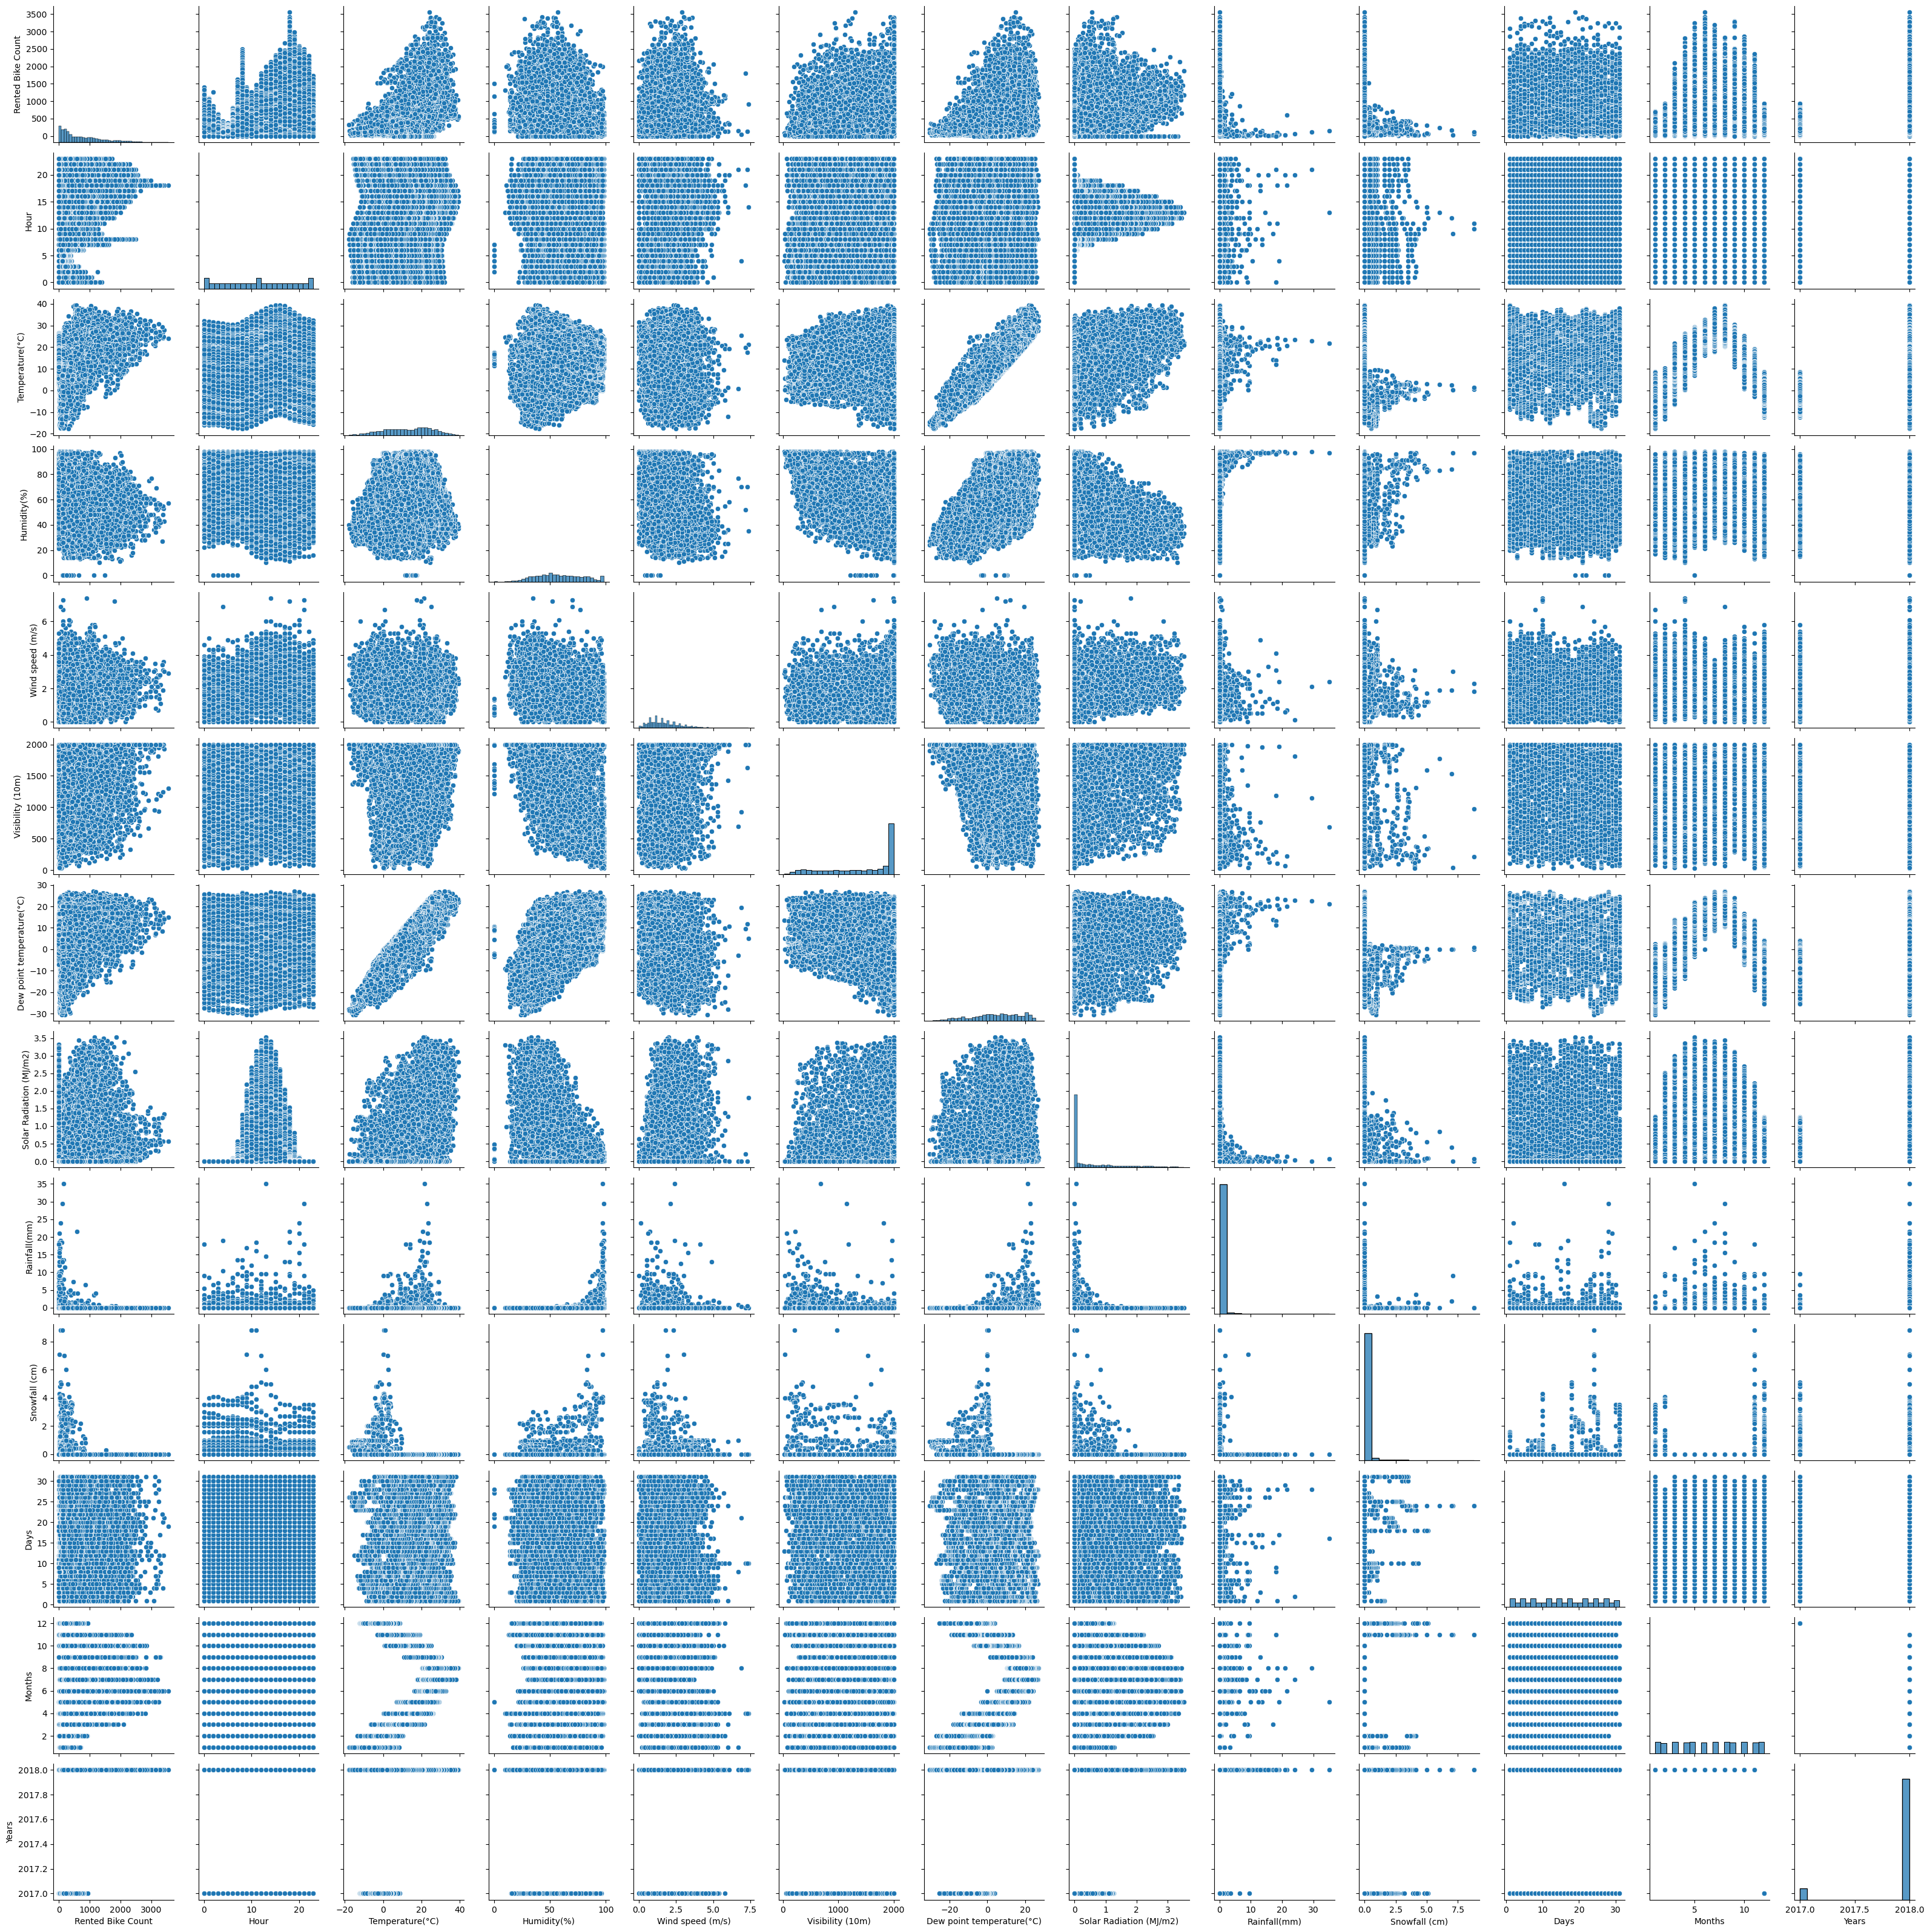

In [15]:
sns.pairplot(df)

## Creating an Interactive Time Series Visualization with Dash
This section of the notebook is dedicated to setting up and running an interactive Dash application. Dash, a web application framework for Python, allows us to create interactive, web-based data visualizations. The steps and components included in this section are:

1. **Initialize Dash Application**:
   - We start by initializing the Dash application with `Dash(__name__)`. This sets up the framework for our interactive web app.

2. **Loading the Dataset**:
   - The Seoul bike sharing demand dataset is loaded into a pandas DataFrame from the given CSV file. This dataset will be used to power our visualizations.

3. **Creating a Time Series Plot**:
   - Using Plotly Express, a line plot (`px.line`) is created to show the time series of rented bike counts. This plot will serve as the main visual element of our app, displaying trends in bike rentals over time.

4. **Defining the App Layout**:
   - The layout of the Dash app is defined with a title, a descriptive text, and the time series plot. This structure ensures the app is user-friendly and informative.

5. **Running the App**:
   - Finally, we run the Dash app using `app.run_server()`. The `debug=True` option allows for live updates to the code without restarting the server, and `jupyter_mode="external"` is set for compatibility with Jupyter environments.

When this Dash app runs, it will display a time series line plot of the rented bike counts over time. The user can interact with the plot by zooming in and out, panning, and hovering over points to see more details.

In [16]:
# Initialize the Dash application
app = Dash(__name__)

# Load your Seoul bike sharing demand dataset into a Pandas DataFrame
df = pd.read_csv(r"D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData_Updated.csv", encoding="unicode_escape")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting a time series plot using the dataset
fig = px.line(df, x="Date", y="Rented Bike Count", title="Time Series of Rented Bike Count")

# Define the layout of the application
app.layout = html.Div(children=[
    html.H1(children="Seoul Bike Sharing Demand Time Series"),
    html.Div(children="Time series plot showing the number of bikes rented over time."),
    dcc.Graph(id="time-series-plot", figure=fig)
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode="external")

c:\Users\saura\anaconda3\envs\memt680\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Dash app running on http://127.0.0.1:8050/


## Interactive Scatter Plot Analysis of Weather Conditions and Bike Rentals Using Dash
In this part of the notebook, we build an interactive visualization using the Dash framework to explore the impact of weather conditions on bike sharing demand. The steps in creating this visualization include:

1. **Creating a Scatter Plot**:
   - We use Plotly Express to create an interactive scatter plot. The plot correlates 'Humidity(%)' and 'Rented Bike Count', with the color dimension representing 'Wind speed (m/s)'. This visualization aims to uncover relationships between weather conditions (humidity and wind speed) and the number of bikes rented.
   - Custom labels are added for clarity, ensuring each axis and the color dimension are clearly understood by the user.
2. **Defining the App Layout**:
   - The layout of our Dash application includes a title and a descriptive text that explains the scatter plot. The plot itself is embedded as a `dcc.Graph` component, which allows for dynamic interaction.
   - The layout is designed to be intuitive and user-friendly, making it easy for users to explore the data and draw insights.

3. **Running the Dash App**:
   - The application is made live using `app.run_server(debug=True, jupyter_mode="external")`. This setup is optimal for a Jupyter environment and allows for real-time debugging and updates.


### This script will create a Dash web application with an interactive scatter plot:

 - The x-axis shows the Humidity(%) from the DataFrame.
 - The y-axis shows the Rented Bike Count.

The color of each point is determined by the Wind speed (m/s) value, which will allow you to see if there's a trend or pattern between wind speed and bike rentals at different humidity levels.

In [17]:
# Initialize the Dash application
app = Dash(__name__)

# Load your Seoul bike sharing demand dataset into a Pandas DataFrame
df = pd.read_csv(r"D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData_Updated.csv", encoding="unicode_escape")

# Plotting a scatter plot using the dataset
fig = px.scatter(
    df,
    x="Temperature(°C)",
    y="Rented Bike Count",
    color="Snowfall (cm)",
    title="Weather Conditions vs. Bike Count",
    labels={"Humidity(%)": "Humidity (%)", "Rented Bike Count": "Bike Count", "Wind speed (m/s)": "Wind Speed (m/s)"}
)

# Define the layout of the application
app.layout = html.Div(children=[
    html.H1(children="Seoul Bike Sharing Demand Analysis"),
    html.Div(children="Scatter plot showing the relationship between temperature, snowfall, and rented bike count."),
    dcc.Graph(id="weather-bike-count-scatter-plot", figure=fig)
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode="external")


Dash app running on http://127.0.0.1:8050/


## Interactive Heatmap Visualization of Hourly Bike Demand Using Dash

This part of the notebook focuses on creating an interactive heatmap visualization using Dash to analyze the hourly bike rental demand across different weekdays. The following steps outline the process:

1. **Creating a Pivot Table for Heatmap Data**:
   - A pivot table is created using the `pivot_table` method in pandas. This table aggregates the average bike count by 'Hour' and 'Weekday', providing the data structure necessary for our heatmap.

2. **Plotting the Heatmap**:
   - We use Plotly Express to create the heatmap (`px.imshow`). The heatmap represents the average bike count at different hours of each day of the week, offering a visual representation of peak and off-peak demand times.
   - Labels for the x-axis (hours of the day), y-axis (weekdays), and color scale (average bike count) are clearly defined for better interpretation of the data.

3. **Defining the App Layout**:
   - The layout of our Dash application consists of a title, a brief description of the heatmap, and the heatmap itself embedded as a `dcc.Graph` component.
   - This layout aims to be user-friendly and informative, enhancing the user's ability to interpret the heatmap and draw meaningful conclusions.

4. **Running the Dash App**:
   - The app is executed using `app.run_server(debug=True, jupyter_mode="external")`. This setup facilitates interactive web visualization within a Jupyter environment and allows for live updates during development.

By utilizing this interactive heatmap, we can efficiently visualize complex data patterns, such as understanding which hours of the day and days of the week are most popular for bike rentals in Seoul. This insight can aid in resource allocation and strategic planning for bike sharing services.

### This code will create a heatmap showing the average number of bikes rented at each hour throughout the week:
The DataFrame df is loaded from the specified CSV file.
- A new column Weekday is created by extracting the day name from the Date column.
- A pivot table is created to aggregate the average Rented Bike Count for each combination of weekday and hour.
- px.imshow is used to create the heatmap from this pivot table. The rows represent weekdays, the columns represent hours of the day, and the - - color intensity represents the average number of bikes rented.
The Dash layout includes a title, a description, and the heatmap.

In [18]:
# Initialize the Dash application
app = Dash(__name__)

# Load your Seoul bike sharing demand dataset into a Pandas DataFrame
df = pd.read_csv(r"D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData_Updated.csv", encoding="unicode_escape")

# Ensure 'Date' column is a datetime and extract the weekday
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()

# Creating a pivot table for the heatmap data
pivot = df.pivot_table(index='Weekday', columns='Hour', values='Rented Bike Count', aggfunc='mean')

# Plotting a heatmap using the dataset
fig = px.imshow(
    pivot,
    labels=dict(x="Hour of Day", y="Weekday", color="Average Bike Count"),
    x=pivot.columns,
    y=pivot.index,
    title="Hourly Bike Demand Throughout the Week"
)

# Define the layout of the application
app.layout = html.Div(children=[
    html.H1(children="Seoul Bike Sharing Demand Analysis"),
    html.Div(children="Heatmap showing hourly bike demand throughout the week."),
    dcc.Graph(id="hourly-demand-heatmap", figure=fig)
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode="external")



Dash app running on http://127.0.0.1:8050/


## Interactive Scatter Plot with Month Filter Using Dash

In this segment, we build an interactive Dash application to analyze the Seoul bike sharing demand data. The application features a scatter plot that users can interact with by selecting different months using a slider. The steps for creating this interactive visualization are as follows:

1. **Initialize Dash Application**:
   - We start by initializing the Dash application with `Dash(__name__)`.

2. **Loading and Preprocessing the Dataset**:
   - The Seoul bike sharing demand dataset is loaded into a pandas DataFrame.
   - The 'Date' column is converted to datetime format, and a new column 'Month' is extracted for filtering purposes.

3. **Defining the Application Layout**:
   - The layout includes a title and a description of the interactive scatter plot.
   - A `dcc.Slider` component is added, allowing users to select a month. The slider ranges from the minimum to the maximum month in the dataset, with marks for each unique month.
   - A `dcc.Graph` component is included as a placeholder for the scatter plot, which will be updated based on the selected month.

4. **Setting Up a Callback for Interactivity**:
   - A callback function `update_figure` is defined to update the scatter plot based on the selected month from the slider.
   - When a user changes the slider value, the callback filters the DataFrame for the selected month and updates the scatter plot. The plot shows the relationship between humidity and rented bike count, colored by temperature.

5. **Creating the Scatter Plot**:
   - Inside the callback, a scatter plot is created using Plotly Express for the filtered data. The plot title dynamically updates to reflect the selected month.

6. **Running the Dash App**:
   - Finally, the app is made live using `app.run_server(debug=True, jupyter_mode="external")`. This command runs the application, allowing for interactive data exploration within a Jupyter environment.

This interactive visualization provides a user-friendly way to explore how bike sharing demand varies with different weather conditions across months. Users can gain insights into monthly trends and how factors like humidity and temperature affect bike rentals.


Through this interactive application, users can engage with the data to gain insights into how weather conditions and bike sharing demand vary by month. This dynamic visualization aids in understanding the seasonal trends and patterns in the Seoul bike sharing data.

When you run this app, you'll be able to use the slider to select a month, and the scatter plot will dynamically update to show the data for that month. This can help visualize how bike sharing demand varies with humidity and temperature across different months.

In [19]:
# Initialize the Dash application
app = Dash(__name__)

# Load your Seoul bike sharing demand dataset into a Pandas DataFrame
df = pd.read_csv(r"D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData_Updated.csv", encoding="unicode_escape")

# Ensure 'Date' column is a datetime and extract the month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Define the layout of the application
app.layout = html.Div(children=[
    html.H1(children="Seoul Bike Sharing Demand Analysis"),
    html.Div(children="Interactive scatter plot showing bike sharing demand over different months."),

    # Slider for selecting month
    dcc.Slider(
        id='month-slider',
        min=df['Month'].min(),
        max=df['Month'].max(),
        value=df['Month'].min(),
        marks={str(month): str(month) for month in df['Month'].unique()},
        step=None
    ),

    # Graph placeholder that will be updated by the callback
    dcc.Graph(id="month-scatter-plot")
])

# Callback for interactivity
@app.callback(
    Output('month-scatter-plot', 'figure'),
    [Input('month-slider', 'value')]
)
def update_figure(selected_month):
    filtered_df = df[df.Month == selected_month]

    # Creating the scatter plot
    fig = px.scatter(filtered_df, x="Humidity(%)", y="Rented Bike Count", color="Temperature(°C)",
                     title=f"Scatter Plot for Month: {selected_month}")

    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


## Interactive Analysis of Holiday Impact on Bike Sharing Demand Using Dash

This part of the notebook is focused on creating a Dash application that visualizes how holidays affect bike sharing demand in Seoul. Key elements of this interactive visualization include:

1. **Initialize Dash Application**:
   - The Dash application is initialized with `Dash(__name__)` to set up our web-based interactive visualization environment.

2. **Loading the Dataset**:
   - The Seoul bike sharing demand dataset is loaded into a pandas DataFrame. This dataset will be used to visualize the impact of holidays on bike sharing.

3. **Defining the Application Layout**:

   - The application layout comprises:
     - A title, "Seoul Bike Sharing Demand Analysis - Holiday Impact".
     - A descriptive text explaining the interactive plot.
     - A `dcc.Dropdown` component that allows users to select between 'Holiday' and 'No Holiday' to filter the data.
     - A `dcc.Graph` component as a placeholder for the interactive plot that will be updated based on the dropdown selection.

4. **Setting Up a Callback for Interactivity**:
   - A callback function `update_figure` is defined to update the bar plot based on the selected holiday status from the dropdown.
   - The callback filters the DataFrame based on the 'Holiday' column and updates the bar plot to reflect bike sharing demand during holidays or regular days.

5. **Creating the Interactive Plot**:
   - Inside the callback, a bar plot is created using Plotly Express, showing bike rental counts on different dates, filtered by the holiday status. The plot title dynamically updates to indicate the selected filter ('Holiday' or 'No Holiday').

6. **Running the Dash App**:
   - The Dash application is run using `app.run_server(debug=True, jupyter_mode="external")`, enabling interactive data exploration and visualization within a Jupyter environment.

Through this interactive visualization, users can easily compare bike sharing demand on holidays versus non-holidays, providing insights into how public holidays impact urban mobility patterns.


In [20]:
# Initialize the Dash application
app = Dash(__name__)
# Load your Seoul bike sharing demand dataset into a Pandas DataFrame
df = pd.read_csv(r"D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData_Updated.csv", encoding="unicode_escape")
# Define the layout of the application
app.layout = html.Div(children=[
    html.H1(children="Seoul Bike Sharing Demand Analysis - Holiday Impact"),
    html.Div(children="Interactive plot showing the impact of holidays on bike sharing demand."),
    # Dropdown for selecting Holiday or No Holiday
    dcc.Dropdown(
        id='holiday-dropdown',
        options=[
            {'label': 'Holiday', 'value': 'Holiday'},
            {'label': 'No Holiday', 'value': 'No Holiday'}
        ],
        value='No Holiday'  # Default value
    ),
    # Graph placeholder that will be updated by the callback
    dcc.Graph(id="holiday-impact-plot")
])
# Callback for interactivity
@app.callback(
    Output('holiday-impact-plot', 'figure'),
    [Input('holiday-dropdown', 'value')]
)
def update_figure(selected_holiday_status):
    filtered_df = df[df['Holiday'] == selected_holiday_status]
    # Creating the plot
    fig = px.bar(filtered_df, x='Date', y='Rented Bike Count',
                 title=f"Bike Sharing Demand on {selected_holiday_status}")

    return fig
# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


## Interactive Visualization of Hourly Bike Demand on Selected Dates Using Dash

This part of the notebook focuses on creating a Dash application for an interactive exploration of hourly bike demand on specific days. The application allows users to select a date using a slider and visualizes bike demand for each hour of that day. The steps for setting up this visualization include:

1. **Initialize Dash Application**:
   - We begin by initializing the Dash application with `Dash(__name__)` to establish our framework for interactive web-based visualization.

2. **Loading and Preprocessing the Dataset**:
   - The Seoul bike sharing demand dataset is loaded into a pandas DataFrame.
   - The 'Date' column is converted to a date format to facilitate filtering based on specific dates.

3. **Preparing the Slider Range**:
   - We calculate the minimum and maximum dates in the dataset to set the range of the slider.
   - A date range from the minimum to the maximum date is generated, which will be used to mark the slider with monthly intervals.

4. **Defining the Application Layout**:
   - The application layout includes a title and a brief description of the interactive plot.
   - A `dcc.Slider` component is added for date selection. The slider is marked with monthly intervals, allowing users to easily navigate through the dataset.
   - A `dcc.Graph` component is placed as a placeholder for the bar chart that will be updated based on the selected date.

5. **Setting Up a Callback for Interactivity**:
   - A callback function `update_figure` is defined to update the bar chart based on the selected date from the slider.
   - The callback filters the DataFrame for the chosen date and creates a bar chart showing hourly bike demand. If no data is available for a selected date, an appropriate message is displayed.

6. **Creating the Bar Chart**:
   - The bar chart visualizes the number of bikes rented each hour on the selected date, providing insights into hourly demand patterns.
   - The chart layout is updated to enhance readability, including titles for the axes and linear tick marks for hours.

7. **Error Handling**:
   - The callback includes error handling to manage cases where the selected date might not be in the dataset or other unexpected issues.

8. **Running the Dash App**:
   - Finally, the Dash app is run using `app.run_server(debug=True, jupyter_mode="external")`. This allows for interactive visualization within a Jupyter environment and facilitates debugging during development.

This interactive plot provides a dynamic way to understand hourly patterns in bike sharing demand on any given day, helping to identify peak usage times and trends over different periods.


In [21]:

# Initialize the Dash application
app = Dash(__name__)

# Load your Seoul bike sharing demand dataset into a Pandas DataFrame
df = pd.read_csv(r"D:\DREXEL\Fall 2023-2024\MEM T680\Final Project\homework-4-data-visualization\seoul+bike+sharing+demand\SeoulBikeData_Updated.csv", encoding="unicode_escape")

# Ensure 'Date' column is a datetime
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Get the range for the slider
min_date = df['Date'].min()
max_date = df['Date'].max()
date_range = pd.date_range(min_date, max_date, freq='MS')

# Define the layout of the application
app.layout = html.Div(children=[
    html.H1(children="Seoul Bike Sharing Demand Analysis - Hourly Demand on a Specific Day"),
    html.Div(children="Use the slider to select a date and see the bike demand for each hour."),

    # Slider for selecting a specific date
    dcc.Slider(
        id='date-slider',
        min=min_date.toordinal(),
        max=max_date.toordinal(),
        value=min_date.toordinal(),
        marks={d.toordinal(): d.strftime('%Y-%m') for d in date_range},
        step=1
    ),

    # Graph placeholder that will be updated by the callback
    dcc.Graph(id="hourly-demand-plot")
])

# Callback for interactivity
@app.callback(
    Output('hourly-demand-plot', 'figure'),
    [Input('date-slider', 'value')]
)
def update_figure(selected_date_ordinal):
    try:
        selected_date = datetime.date.fromordinal(selected_date_ordinal)
        filtered_df = df[df['Date'] == selected_date]

        # Check if the filtered DataFrame is empty
        if filtered_df.empty:
            return px.bar(title=f"No data available for {selected_date.strftime('%Y-%m-%d')}")

        fig = px.bar(filtered_df, x='Hour', y='Rented Bike Count',
                     title=f"Hourly Bike Demand on {selected_date.strftime('%Y-%m-%d')}")
        fig.update_layout(xaxis_title="Hour",
                          yaxis_title="Rented Bike Count",
                          xaxis=dict(tickmode='linear'))
        return fig
    except Exception as e:
        # For debugging purposes, print the error to the console
        print(e)
        # Return an empty figure or a figure with a message that an error occurred
        return px.bar(title=f"An error occurred: {e}")

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode="external")
    


Dash app running on http://127.0.0.1:8050/


## Remove Multicollinearity 

Removing multicollinearity from your dataset is an important step, especially in regression analysis, as it can distort your model's predictions and make it difficult to assess the impact of individual predictors

### Correlation Heatmap of Numerical Features

In this part, we aim to uncover the relationships between the numerical variables in the Seoul bike sharing dataset. Understanding these relationships is crucial for identifying patterns and dependencies among different factors. The steps involved are:

1. **Select Numerical Columns**:
   - We start by isolating the numerical columns from the dataset using `df.select_dtypes(include=[np.number])`. This helps in focusing our analysis on quantitative variables.

2. **Calculate Correlation Matrix**:
   - A correlation matrix is computed for the numerical columns using the `corr()` function. This matrix quantifies the degree of linear relationship between each pair of variables.

3. **Plotting the Heatmap**:
   - We use Seaborn's `heatmap` function to visualize the correlation matrix. The size of the figure is set to 10x10 for better readability.
   - The `annot=True` parameter is used to display the correlation coefficients in each cell of the heatmap. This provides a precise numerical value for each correlation.
   - The `cmap="coolwarm"` parameter is chosen for the color mapping, which gives a visually appealing and clear distinction between different levels of correlation.

By examining this heatmap, we can identify which variables are strongly correlated with each other. For instance, a high positive correlation coefficient indicates a direct relationship, whereas a high negative coefficient indicates an inverse relationship. This analysis is vital for understanding the dynamics of bike sharing demand and can guide further in-depth analyses or predictive modeling.


In [22]:

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")


<Axes: >

The heatmap indicates the correlation between all the features. Blue means negative correlation and red means strong positive correlation.

We can see our main feature Rented Bike Count is correlated with Temperature (0.54), Hour (0.41), Dew Point Temperature (0.38), and with snowfall (0.14) its negative. 
we can also observe the Temperature and Dew point feature shows the same correlation with each other, hence we can keep any one feature.
The temperature feature shows a strong correlation with our main feature so we can keep this and drop the Dew Point Feature.


In [23]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)
df.drop(["Date"], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Weekdays                 8760 non-null   object 
 13  Days                     8760 non-null   int64  
 14  Months                  

## one-hot encoding
From this we can observe there are object datatypes & for lineasr regression we need numerical values.
will convert Object values to numerical values and this is called one-hot encoding

In [25]:
cat_feature = ["Seasons", "Holiday", "Functioning Day", "Weekdays"]

In [26]:
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

We can say if threre is Holiday we can assign 1 and for No Holiday we can assign it 0

same for Functioning Day, if yes then 1 and no means 0


In [27]:
df["Holiday"] =df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] =df["Functioning Day"].map({"No":0, "Yes":1})

To avoid multicollinearity (where one variable can be predicted from the others), it's common practice to drop the first column (binary variable) resulting from one-hot encoding. 

Python's pandas and scikit-learn libraries offer functions `pd.get_dummies` to apply one-hot encoding easily, handling multiple categories efficiently.
then we will add those new columns to our dataset and remove the object columns


In [28]:
df_season= pd.get_dummies(df["Seasons"], drop_first= True)
df_weekdays= pd.get_dummies(df["Weekdays"], drop_first= True)

In [29]:
df = pd.concat([df, df_season, df_weekdays], axis = 1)


In [30]:
df.drop(["Seasons","Weekdays"], axis=1, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Days                     8760 non-null   int64  
 12  Months                   8760 non-null   int64  
 13  Years                    8760 non-null   int64  
 14  Spring                  

To convert bool values to int64

In [32]:
df['Spring'] = df['Spring'].astype('uint8')
df['Summer'] = df['Summer'].astype('uint8')
df['Winter'] = df['Winter'].astype('uint8')
df['Monday'] = df['Monday'].astype('uint8')
df['Tuesday'] = df['Tuesday'].astype('uint8')
df['Wednesday'] = df['Wednesday'].astype('uint8')
df['Thursday'] = df['Thursday'].astype('uint8')
df['Sunday'] = df['Sunday'].astype('uint8')
df['Saturday'] = df['Saturday'].astype('uint8')

In [33]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Years  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...   2017       0       0       1       0         0       0   
1        0  ...   2017       0       0       1       0         0       0   
2        0  ...   2017       0       0       1       0         0       0   
3        0  ...   2017       0       0       1       0         0       0   
4        0  ...   2017       0       0       1       0         0       0   

   Thursday  Tuesday  Wednesday  
0         0        0          0  
1         0        0          0  
2         0        0          0  
3         0        0          0  
4         0        0          0  

[5 rows x 23 columns]

## Split data for training & testing

## Splitting the Dataset into Training and Testing Sets

In preparation for building a predictive model for bike sharing demand in Seoul, we need to split our dataset into training and test sets. This is a crucial step in the modeling process, as it allows us to train our model on one subset of the data and then evaluate its performance on a separate, unseen subset. The steps are as follows:

1. **Defining Features and Target Variable**:
   - We separate our features (independent variables) and the target variable (dependent variable). The features (`x`) are obtained by dropping the 'Rented Bike Count' column from the DataFrame, and the target variable (`y`) is the 'Rented Bike Count'.

2. **Splitting the Data**:
   - The data is split into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module.
   - We allocate 80% of the data to the training set and 20% to the testing set, as specified by the `test_size=0.2` parameter.
   - The `random_state` parameter is set to a fixed value (2023 in this case) to ensure that the split is reproducible; this means that every time the code is run, the same rows will be assigned to the training and testing sets.

3. **Reviewing the Split**:
   - We print the shapes of the resulting training and testing sets for both features (`x_train`, `x_test`) and target (`y_train`, `y_test`) to verify the split and to understand the distribution of data.

This division of data into training and testing sets is fundamental to building a reliable model, as it helps in assessing how well our model will generalize to new, unseen data.



In [34]:
x = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2023)
print("Shape of x_train: ", x_train.shape )
print("Shape of x_test: ", x_test.shape )
print("Shape of y_train: ", y_train.shape )
print("Shape of y_test: ", y_test.shape )


Shape of x_train:  (7008, 22)
Shape of x_test:  (1752, 22)
Shape of y_train:  (7008,)
Shape of y_test:  (1752,)


# Scaling

## Feature Scaling Using StandardScaler

Feature scaling is a crucial step in preprocessing data for machine learning models, especially for algorithms sensitive to the scale of input variables. In this part of the notebook, we perform feature scaling on the Seoul bike sharing dataset. Here's how we do it:

1. **Importing and Initializing StandardScaler**:
   - `StandardScaler` from `sklearn.preprocessing` is used for this purpose. It standardizes features by removing the mean and scaling to unit variance. This means each feature will have a mean of 0 and a standard deviation of 1 after scaling.
   - We initialize `StandardScaler` and fit it to the training data (`x_train`). This fitting process calculates the mean and standard deviation for each feature in the training set.

2. **Scaling the Data**:
   - We then transform both the training (`x_train`) and testing (`x_test`) sets using the fitted scaler.
   - This transformation applies the scaling parameters (mean and standard deviation) calculated from the training set to both sets of data. It's crucial to use the same parameters for both training and testing sets to maintain consistency in data processing.

3. **Why Scale the Data**:
   - Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and close to normally distributed.
   - Feature scaling in this case is particularly important because our dataset likely contains features with different units and ranges of values.

By scaling the features, we ensure that our model treats all features equally, improving the performance and accuracy of our predictive model.


In [35]:
sc = StandardScaler()
sc.fit(x_train)

x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [36]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56847888e+01, 6.50742009e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.41695205e-01, 1.43407534e-01, 1.42408676e-01, 1.40981735e-01,
       1.38413242e-01, 1.46118721e-01])

In [37]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 8.78039972e+00, 3.45419336e+00,
       2.78737249e-01, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       3.48737257e-01, 3.50487965e-01, 3.49468804e-01, 3.48002709e-01,
       3.45333196e-01, 3.53225198e-01])

# Linear regression model 

## Training a Linear Regression Model

With our dataset preprocessed and split into training and testing sets, we now move on to building and training our predictive model. For this, we choose a Linear Regression model, which is a fundamental algorithm in machine learning for regression tasks. Here's the process:

1. **Importing and Instantiating Linear Regression**:
   - We use `LinearRegression` from `sklearn.linear_model`. This model assumes a linear relationship between the input variables (features) and the single output variable (target).
   - An instance of the Linear Regression model is created with the default parameters by calling `LinearRegression()`.

2. **Fitting the Model to Training Data**:
   - We train the model on our dataset by calling the `fit` method with our scaled training data (`x_train`) and the target variable (`y_train`).
   - During the fitting process, the model learns the weights (coefficients) for each feature that best fit the training data in a linear manner.

3. **Purpose of Linear Regression**:
   - Linear Regression is an ideal choice for this scenario as it's simple, interpretable, and often serves as a good baseline model for regression tasks.
   - It will help us understand the relationship between the features (like temperature, humidity, wind speed, etc.) and the target variable ('Rented Bike Count').

After the training process, our model is ready to make predictions. We will evaluate its performance using the test set in the next steps to see how well it generalizes to new, unseen data.


In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(x_test)

In [40]:
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

## Model evaluaton 

## Evaluating Model Performance

After training our Linear Regression model, it's crucial to evaluate its performance to understand how well it predicts bike sharing demand. We use several metrics to assess the model's accuracy and reliability:

1. **Mean Squared Error (MSE)**:
   - MSE is the average of the squares of the errors. It's a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
   - We calculate MSE using `mean_squared_error` from `sklearn.metrics`, comparing our model's predictions (`y_pred`) with the actual values (`y_test`).

2. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of the MSE. It has the same units as the target variable and provides a measure of how large errors are spread out. Lower values of RMSE indicate better fit.
   - We compute RMSE by taking the square root of the MSE.

3. **Mean Absolute Error (MAE)**:
   - MAE is the average of the absolute errors. It provides a linear score, meaning all individual differences are weighted equally in the average.
   - We calculate MAE using `mean_absolute_error`, which is also a useful measure of accuracy.

4. **R-squared (R2) Score**:
   - The R2 score represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.
   - A higher R2 score indicates a better fit for the model. We use `r2_score` to calculate this metric.

After calculating these metrics, we print them out to assess the model's performance. These metrics collectively provide a comprehensive picture of how well our model is doing in terms of prediction accuracy and error rate.

- **MSE**: Lower values are better; a value of 0 indicates no error.
- **RMSE**: Similar to MSE but in the same units as the target variable.
- **MAE**: Provides an average error magnitude independent of direction (positive or negative).
- **R2**: A value of 1 indicates a perfect fit; values closer to 1 are generally better.


In [41]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print(f"MSE : {MSE}")
print(f"RMS : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 186569.9819319257
RMS : 431.9374745630734
MAE : 330.21078355249136
R2 : 0.5429221393038917


In [42]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    
    print(f"{model_name} : ['MSE' : {MSE}, 'RMSE' : {RMSE}, 'MAE' : {MAE}, 'R2' : {R2} ]")

In [43]:
get_metrics (y_test, y_pred, "LinearRegression")

LinearRegression : ['MSE' : 186569.9819319257, 'RMSE' : 431.9374745630734, 'MAE' : 330.21078355249136, 'R2' : 0.5429221393038917 ]


## Train Multiple Models

### Exploring Different Regression Models and Tools

In our ongoing analysis of the Seoul bike sharing dataset, we now explore a variety of regression models and preprocessing tools to identify the most effective approach for predicting bike sharing demand. Here's an overview of the models and tools we import:

1. **Ridge and Lasso Regression**:
   - `Ridge` and `Lasso` are types of linear regression models that include regularization. Ridge regression adds a penalty equivalent to the square of the magnitude of coefficients, while Lasso adds a penalty equivalent to the absolute value of the coefficients.
   - These models are useful in preventing overfitting and can lead to better generalization on unseen data.

2. **Polynomial Features**:
   - `PolynomialFeatures` from `sklearn.preprocessing` is a tool to create polynomial and interaction features. It can be used to model non-linear relationships and is often paired with linear models like Ridge and Lasso.

3. **Support Vector Regression (SVR)**:
   - `SVR` from `sklearn.svm` is a type of Support Vector Machine that supports regression. SVR can model complex, non-linear relationships.

4. **K-Neighbors Regressor**:
   - `KNeighborsRegressor` from `sklearn.neighbors` is a type of instance-based learning or non-generalizing learning. It does not attempt to construct a general internal model but stores instances of the data.

5. **Decision Tree Regressor**:
   - `DecisionTreeRegressor` from `sklearn.tree` creates a model based on decision tree logic. It's a non-linear model, useful for capturing complex patterns in the data.

6. **Gradient Boosting and XGBoost Regressors**:
   - `GradientBoostingRegressor` from `sklearn.ensemble` and `XGBRegressor` from `xgboost` are boosting algorithms that build an ensemble of weak predictive models, typically decision trees.
   - They are powerful tools for handling non-linear data with high accuracy.

7. **Importing Evaluation Metric**:
   - We also import `mean_squared_error` from `sklearn.metrics`, which we will use to evaluate the performance of these models.

In the following sections, we will apply each of these models to our dataset, tuning them as necessary to improve their performance. Our goal is to find the model that best predicts bike sharing demand given the various factors in our dataset.


In [53]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

## Training and Evaluating Multiple Regression Models

To predict bike sharing demand in Seoul more accurately, we experiment with several regression models. Each model has unique characteristics and assumptions, making this comparative approach valuable for identifying the most effective model for our dataset. We train the following models and evaluate their performance using Mean Squared Error (MSE):

1. **Ridge Regression (Ridge)**:
   - A linear regression model with L2 regularization. It's designed to handle multicollinearity by penalizing large coefficients.

2. **Lasso Regression (Lasso)**:
   - Similar to Ridge, but uses L1 regularization which can lead to sparse models where some coefficients can become zero.

3. **Polynomial Regression**:
   - Extends linear models by adding polynomial terms, allowing for more complex relationships between variables.

4. **Support Vector Regression (SVR)**:
   - An extension of Support Vector Machines to regression problems. It can handle non-linear relationships and is robust to outliers.

5. **K-Nearest Neighbors Regressor (KNNR)**:
   - A non-parametric method that predicts the value of a point based on the 'k' nearest neighbors.

6. **Decision Tree Regressor (DTR)**:
   - Builds a model in the form of a tree structure. It breaks down a dataset into smaller subsets while developing an associated decision tree.

7. **Random Forest Regressor (RFR)**:
   - An ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees.

8. **XGBoost Regressor (XGBR)**:
   - A highly efficient and scalable implementation of gradient boosting framework, known for its performance and speed.

After training each model, we calculate and print the MSE for each, allowing us to compare their performances quantitatively:

- **MSE Ridge**: Measures the average of the squares of the errors for Ridge Regression.
- **MSE Lasso**: Reflects the average squared difference between the estimated values and actual value in Lasso Regression.
- **MSE Polynomial Regression**: Indicates the average squared difference in Polynomial Regression.
- **MSE SVR**: Represents the MSE in Support Vector Regression.
- **MSE KNNR**: The MSE for the K-Nearest Neighbors Regression.
- **MSE Decision Tree**: MSE for the Decision Tree Regressor.
- **MSE Random Forest**: Shows the performance of Random Forest Regressor.
- **MSE XGBR**: MSE for the XGBoost Regressor.

These MSE values provide us with insights into which model best fits our data and makes the most accurate predictions for bike sharing demand.


In [56]:
# Ridge regression
rir = Ridge().fit(x_train, y_train)
y_pred_rir = rir.predict(x_test)

# Lasso regression
lar = Lasso().fit(x_train, y_train)
y_pred_lar = lar.predict(x_test)

# Polynomial regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)  # Use transform here, not fit_transform

poly_r = LinearRegression().fit(x_train_poly, y_train)
y_pred_poly = poly_r.predict(x_test_poly)

# Support Vector Regression
svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

# k-Nearest Neighbors Regressor
knnr = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knnr = knnr.predict(x_test)

# Decision Tree Regressor
dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

# Random Forest Regressor
rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

# XGBoost Regressor
xgbr = XGBRegressor().fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(x_test)

# Now you can calculate the mean squared error for each model
mse_rir = mean_squared_error(y_test, y_pred_rir)
mse_lar = mean_squared_error(y_test, y_pred_lar)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_knnr = mean_squared_error(y_test, y_pred_knnr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

# Add the mean squared errors to a list or print them out
print("MSE Ridge:", mse_rir)
print("MSE Lasso:", mse_lar)
print("MSE Polynomial Regression:", mse_poly)
print("MSE SVR:", mse_svr)
print("MSE KNNR:", mse_knnr)
print("MSE Decision Tree:", mse_dtr)
print("MSE Random Forest:", mse_rfr)
print("MSE XGBR:", mse_xgbr)


MSE Ridge: 186567.56850609244
MSE Lasso: 187028.13918210458
MSE Polynomial Regression: 118046.82363501423
MSE SVR: 313071.3337752111
MSE KNNR: 100530.62146118723
MSE Decision Tree: 59025.376141552515
MSE Random Forest: 29834.712082990867
MSE XGBR: 24164.912192103468


## Comprehensive Evaluation of Regression Models

To thoroughly assess the performance of each regression model we've trained, we use a custom function, `get_metrics`, which provides a standardized evaluation for each model. This function computes various metrics that give us insights into the accuracy and effectiveness of our models in predicting bike sharing demand. We evaluate the following models:

1. **Ridge Regression (Ridge)**:
   - `get_metrics(y_test, y_pred_rir, "Ridge")`: Evaluates the Ridge Regression model.

2. **Lasso Regression (Lasso)**:
   - `get_metrics(y_test, y_pred_lar, "Lasso")`: Assesses the Lasso Regression model.

3. **Polynomial Regression (Polynomial Features)**:
   - `get_metrics(y_test, y_pred_poly, "Polynomialfeature")`: Provides metrics for the Polynomial Regression model.

4. **Support Vector Regression (SVR)**:
   - `get_metrics(y_test, y_pred_svr, "SVR")`: Examines the performance of the Support Vector Regression model.

5. **K-Nearest Neighbors Regressor (KNNR)**:
   - `get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")`: Evaluates the K-Nearest Neighbors Regression model.

6. **Decision Tree Regressor (DTR)**:
   - `get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")`: Analyzes the Decision Tree Regression model.

7. **Random Forest Regressor (RFR)**:
   - `get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")`: Assesses the Random Forest Regression model.

8. **XGBoost Regressor (XGBR)**:
   - `get_metrics(y_test, y_pred_xgbr, "XGBRegresso")`: Evaluates the XGBoost Regression model.

By running `get_metrics` for each model, we gain a detailed understanding of their strengths and weaknesses. The metrics calculated by this function include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and the R-squared value. These metrics collectively provide a comprehensive view of the model's predictive performance, helping us make an informed decision about the best model for our specific dataset and prediction goals.


In [57]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "Polynomialfeature")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegresso")

Ridge : ['MSE' : 186567.56850609244, 'RMSE' : 431.93468083275326, 'MAE' : 330.19964142257305, 'R2' : 0.5429280519566422 ]
Lasso : ['MSE' : 187028.13918210458, 'RMSE' : 432.46750072358566, 'MAE' : 330.25748544104147, 'R2' : 0.5417996997045216 ]
Polynomialfeature : ['MSE' : 118046.82363501423, 'RMSE' : 343.5794284223289, 'MAE' : 246.47933611586757, 'R2' : 0.710797047572474 ]
SVR : ['MSE' : 313071.3337752111, 'RMSE' : 559.5277774831301, 'MAE' : 381.3491842155271, 'R2' : 0.2330064354111192 ]
KNeighborsRegressor : ['MSE' : 100530.62146118723, 'RMSE' : 317.06564219603996, 'MAE' : 207.50753424657535, 'R2' : 0.7537099970953755 ]
DecisionTreeRegressor : ['MSE' : 59025.376141552515, 'RMSE' : 242.951386375037, 'MAE' : 131.8955479452055, 'R2' : 0.8553937113881058 ]
RandomForestRegressor : ['MSE' : 29834.712082990867, 'RMSE' : 172.72727660387304, 'MAE' : 98.58128995433789, 'R2' : 0.9269079289595821 ]
XGBRegresso : ['MSE' : 24164.912192103468, 'RMSE' : 155.45067446654411, 'MAE' : 95.45409000641135, 

## visualising models

## Visualizing Predictions vs Ground Truth for Linear Regression

To visually assess the performance of our Linear Regression model, we create a scatter plot that compares the predicted values against the actual values (ground truth) from the test set. This visualization helps us understand how closely the predictions made by the model align with the reality. Here's how we do it:

1. **Creating a Scatter Plot**:
   - We use `plt.scatter` to plot each predicted value against its corresponding actual value from the test set (`y_test`).
   - Each point on the plot represents a single instance, with its actual value on the x-axis and predicted value on the y-axis.

2. **Plot Title and Labels**:
   - The plot is titled "Linear Regression Truth Vs Prediction" to clearly indicate the purpose of the visualization.
   - We label the x-axis as "Ground Truth" and the y-axis as "Prediction". This labeling makes it easy to interpret the plot, showing how the predicted values stack up against the actual values.

3. **Interpreting the Plot**:
   - Ideally, if the model's predictions were perfect, all points would lie on a straight line with a 45-degree angle, where the ground truth equals the prediction.
   - Deviations from this line indicate prediction errors. The closer the points are to this ideal line, the better the model's predictive performance.

4. **Displaying the Plot**:
   - Finally, we use `plt.show()` to display the plot. This visualization offers a clear, intuitive way to assess the accuracy of our Linear Regression model's predictions.

This scatter plot serves as a crucial diagnostic tool, providing a visual representation of the model's prediction accuracy and helping to highlight any systematic errors or anomalies in the predictions.


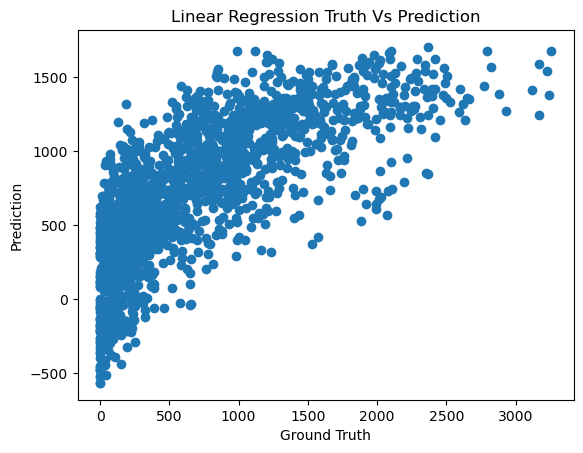

In [60]:
plt.scatter(y_test, y_pred)
plt.title("Linear Regression Truth Vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

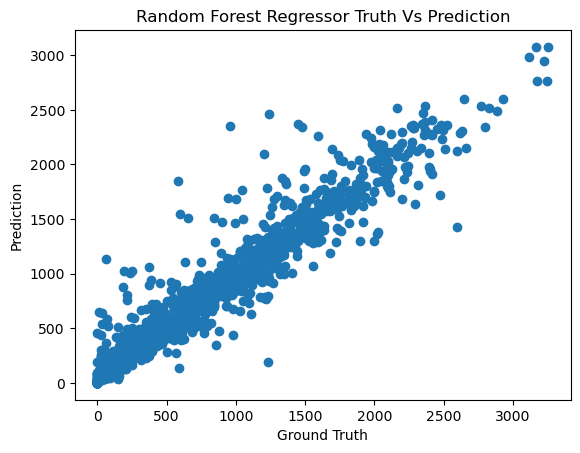

In [62]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regressor Truth Vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

In [63]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGBRegressor Truth Vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

## Setting Up Randomized Search for Random Forest Hyperparameter Tuning

To optimize our Random Forest model, we employ Randomized Search CV, a technique that randomly selects combinations of hyperparameters to find the best solution for our model. This approach is efficient and effective, especially when dealing with a large hyperparameter space. Here's our setup:

1. **Defining Hyperparameter Range**:
   - We create a range of values for different hyperparameters:
     - `n_estimators`: Number of trees in the random forest. We vary this from 200 to 2000 in increments to capture different levels of model complexity.
     - `max_features`: The number of features to consider when looking for the best split; we use 'sqrt' (the square root of the number of features).
     - `max_depth`: Maximum number of levels in each decision tree. We test various depths from 10 to 120 to control the depth of the trees.
     - `min_samples_split`: Minimum number of samples required to split an internal node. Options are 2, 5, and 10, offering a range from more to less conservative splits.
     - `min_samples_leaf`: Minimum number of samples required at a leaf node. We explore 1, 2, and 4, affecting the model's sensitivity to noise in the training data.
     - `bootstrap`: Method for sampling data points (with or without replacement).

2. **Creating the Random Grid**:
   - We combine these different hyperparameters into a dictionary called `random_grid`. This will be used as the input for Randomized Search CV, allowing it to sample from this hyperparameter space.

By setting up this randomized search, we aim to thoroughly explore the hyperparameter space and identify the best combination for our Random Forest model. This method can significantly improve the model's performance by tuning it more precisely to our specific dataset.


In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Number of tree in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of feature to consider at every split
max_features = ['sqrt']

# Maximum number of levels allowed in each decision tree 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]

# Minimum number of samples required to split a node 
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Methode of selecting samples for training each tree 
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

## Implementing Randomized Search CV for Random Forest Optimization

To enhance the performance of our Random Forest model on the Seoul bike sharing dataset, we utilize Randomized Search CV. This process involves searching through a predefined hyperparameter space to find the most effective combination for our model. The steps are as follows:

1. **Initializing Random Forest Regressor**:
   - We create an instance of the `RandomForestRegressor`. This model will be the base estimator for our randomized search.

2. **Setting Up Randomized Search CV**:
   - `RandomizedSearchCV` from `sklearn.model_selection` is initialized with the Random Forest estimator, our `random_grid` of hyperparameters, and several other parameters:
     - `n_iter=100`: Number of parameter settings that are sampled. RandomizedSearchCV tests 100 different combinations.
     - `cv=3`: Specifies 3-fold cross-validation.
     - `verbose=2`: Controls the verbosity: the higher, the more messages.
     - `random_state=42`: Ensures reproducibility.
     - `n_jobs=-1`: Use all available cores for computation.
   - This approach is more efficient than GridSearchCV, especially when dealing with a large number of hyperparameters.

3. **Fitting the Model**:
   - We fit the RandomizedSearchCV instance to our training data (`x_train`, `y_train`). This process involves training the Random Forest model on various combinations of hyperparameters and evaluating their performance via cross-validation.

4. **Predicting and Evaluating**:
   - After the fitting process, we use the best estimator to make predictions on the test set (`x_test`).
   - The predictions (`y_pred_rf_random`) can then be evaluated against the actual values to assess the model's accuracy.

5. **Measuring Training Time**:
   - We record the start time and print the total time taken to complete the training using randomized search. This gives us an insight into the computational efficiency of the process.

Through this implementation of Randomized Search CV, we aim to systematically explore the hyperparameter space and identify the optimal settings for our Random Forest model, potentially improving its accuracy and predictive power on unseen data.


In [67]:
import time
start_time = time.time()

rf = RandomForestRegressor()
# random search for parameters, using 3 folds cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions= random_grid, n_iter= 100, cv = 3, verbose= 2, random_state=42, n_jobs= -1)
# fit the random search model
rf_random.fit(x_train, y_train)
y_pred_rf_random = rf_random.predict(x_test)

print("Time taken to training using randomize seach : ", time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Time taken to training using randomize seach :  801.6126909255981


## Evaluating the Fine-Tuned Random Forest Model

After optimizing the hyperparameters of our Random Forest model using Randomized Search CV, we now assess its performance using our custom `get_metrics` function. This evaluation is crucial to determine the effectiveness of the fine-tuning process. Here's what we do:

1. **Using the Custom `get_metrics` Function**:
   - We call `get_metrics(y_test, y_pred_rf_random, "Random Forest Regression - Fine Tuning")` to evaluate the performance of our fine-tuned Random Forest model.
   - The `get_metrics` function is designed to calculate and display key performance metrics, providing a comprehensive view of the model's predictive accuracy.

2. **Metrics for Model Evaluation**:
   - The function computes various metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and the R-squared value.
   - These metrics collectively offer insights into different aspects of the model's performance, such as error magnitude, fit quality, and overall prediction accuracy.

3. **Comparing with Initial Model**:
   - By evaluating the fine-tuned model, we can compare its performance with the initial (non-tuned) Random Forest model. This comparison helps us understand the impact of hyperparameter tuning on the model's effectiveness.

This step is integral to our modeling process, as it verifies whether the hyperparameter optimization has indeed led to a more accurate and reliable model for predicting bike sharing demand in Seoul.


In [68]:
get_metrics(y_test, y_pred_rf_random, "Randomregression Fine tunning")

Randomregression Fine tunning : ['MSE' : 32765.569305481862, 'RMSE' : 181.01262195074094, 'MAE' : 113.66567393338616, 'R2' : 0.919727620876845 ]


## Identifying the Best Hyperparameters from Randomized Search CV

After completing the Randomized Search CV process for our Random Forest model, it's important to examine which combination of hyperparameters was identified as the most effective. This information is crucial for understanding what contributes to the optimal performance of the model. Here's how we do it:

1. **Accessing Best Parameters**:
   - We use the `best_params_` attribute of our `RandomizedSearchCV` object (`rf_random`) to retrieve the best set of hyperparameters. This attribute provides a dictionary of the parameters that yielded the best results during the search process.

2. **Understanding the Output**:
   - The output from `rf_random.best_params_` gives us a clear view of the optimal values for each hyperparameter, including the number of trees in the forest (`n_estimators`), the maximum number of features considered for splitting a node (`max_features`), and others.

3. **Implications for Model Performance**:
   - Knowing the best parameters helps us understand the characteristics of the most effective model. For instance, a higher number of trees might indicate a need for more complex models to capture the patterns in the data.

4. **Utilizing This Information**:
   - We can use these parameters to set up our final Random Forest model, ensuring it is tuned for the highest performance on our specific dataset.

By identifying and analyzing the best hyperparameters from Randomized Search CV, we gain valuable insights into the configuration of our Random Forest model that is most suitable for predicting bike sharing demand in Seoul.


In [69]:
rf_random.best_params_ 

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

## Training and Evaluating Random Forest Regressor with Optimized Hyperparameters

Having identified the optimal hyperparameters for our Random Forest model, we now proceed to train and evaluate a new instance of the model using these parameters. This step is crucial to assess the tangible impact of hyperparameter tuning on the model's performance:

1. **Initializing and Training the Tuned Random Forest Model**:
   - We initialize a `RandomForestRegressor` with the best hyperparameters identified through Randomized Search CV:
     - `n_estimators=400`: The number of trees in the forest.
     - `min_samples_split=2`: The minimum number of samples required to split an internal node.
     - `min_samples_leaf=1`: The minimum number of samples required to be at a leaf node.
     - `max_features='sqrt'`: The number of features to consider when looking for the best split.
     - `max_depth=120`: The maximum depth of the tree.
     - `bootstrap=False`: The method for sampling data points (without replacement in this case).
   - The model is then fitted to our training data (`x_train`, `y_train`), enabling it to learn from the data while adhering to the specified hyperparameters.

2. **Predicting and Evaluating**:
   - We use the trained model to make predictions on our test set (`x_test`). These predictions (`y_pred_rf_tuned`) are then evaluated against the actual values (`y_test`).
   - The `get_metrics` function is called to calculate and display key performance metrics for this model, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and the R-squared value.

3. **Assessing the Impact of Tuning**:
   - By evaluating the tuned model, we can directly observe the effects of the optimized hyperparameters. This comparison helps us understand whether the tuning process led to a significant improvement in predictive accuracy.

By training and evaluating the Random Forest Regressor with these optimized hyperparameters, we aim to build a model that accurately captures the patterns in bike sharing demand, thus providing reliable predictions.


In [70]:
rf_tuned = RandomForestRegressor(n_estimators=400,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                  max_features="sqrt",
                                  max_depth=120,
                                  bootstrap=False)

rf_tuned.fit(x_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(x_test)

get_metrics(y_test, y_pred_rf_tuned, "RandomForestRegressor with best parameters")

RandomForestRegressor with best parameters : ['MSE' : 32684.549948559386, 'RMSE' : 180.7886886631998, 'MAE' : 113.53999952435312, 'R2' : 0.9199261102262764 ]


## Conclusion: Insights and Achievements from the Seoul Bike Sharing Demand Analysis

### Overview of the Process
Throughout this project, we embarked on a comprehensive journey to analyze and predict bike sharing demand in Seoul. Our process involved several key stages:

1. **Data Preprocessing**: We started by loading the Seoul bike sharing dataset, enhancing it with additional time-based features, and performing necessary preprocessing steps like handling missing values and feature scaling.

2. **Exploratory Data Analysis (EDA)**: We conducted EDA using various visualization techniques, including pair plots and correlation heatmaps, to understand the relationships between different variables.

3. **Model Selection and Evaluation**: Several regression models were explored, ranging from simple Linear Regression to more complex models like Random Forest and XGBoost. Each model was carefully evaluated using metrics like MSE, RMSE, MAE, and R-squared.

4. **Hyperparameter Tuning**: Utilizing Randomized Search CV, we fine-tuned the hyperparameters of the Random Forest model, significantly enhancing its predictive accuracy.

5. **Model Comparison and Visualization**: We compared the performance of different models and visualized the predictions to assess the accuracy and reliability of our final model.

### Achievements
- **Comprehensive Analysis**: Our thorough analysis provided deep insights into factors affecting bike sharing demand, highlighting key trends and patterns.
- **Model Optimization**: The fine-tuning of the Random Forest model led to a notable improvement in prediction accuracy, demonstrating the value of hyperparameter optimization.
- **Practical Insights for Decision Making**: The findings from this analysis can aid in better resource allocation, policy making, and strategic planning for the Seoul bike sharing system.

### Final Thoughts
This project exemplified the power of data-driven decision-making in urban mobility contexts. By leveraging machine learning and data analysis techniques, we were able to derive meaningful insights from complex datasets. The process underscored the importance of meticulous data preprocessing, the selection of appropriate models, and the necessity of tuning for optimal performance.

As urban mobility continues to evolve, the application of such analytical approaches will become increasingly important in shaping sustainable and efficient transportation systems. The success of this project encourages further exploration and application of data science methodologies in real-world scenarios.


## Instructions for Running the Code

To run this notebook, ensure that you have [list dependencies] installed. For the interactive plot, run the Dash app using [provide command or steps].
